<a href="https://colab.research.google.com/github/sdesai38/5105_SD/blob/main/5105_Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Train Loss: 1.5737, Val Loss: 1.3325
Epoch 2, Train Loss: 1.2698, Val Loss: 1.2271
Epoch 3, Train Loss: 1.1633, Val Loss: 1.1398
Epoch 4, Train Loss: 1.0985, Val Loss: 1.1115
Epoch 5, Train Loss: 1.0477, Val Loss: 1.0876
Epoch 6, Train Loss: 1.0129, Val Loss: 1.0694
Epoch 7, Train Loss: 0.9828, Val Loss: 1.0721
Epoch 8, Train Loss: 0.9576, Val Loss: 1.0366
Epoch 9, Train Loss: 0.9410, Val Loss: 1.0369
Epoch 10, Train Loss: 0.9217, Val Loss: 1.0196
Epoch 11, Train Loss: 0.9064, Val Loss: 1.0366
Epoch 12, Train Loss: 0.8920, Val Loss: 1.0151
Epoch 13, Train Loss: 0.8777, Val Loss: 1.0156
Epoch 14, Train Loss: 0.8665, Val Loss: 1.0404
Epoch 15, Train Loss: 0.8575, Val Loss: 1.0141
Epoch 16, Train Loss: 0.8434, Val Loss: 1.0298
Epoch 17, Train Loss: 0.8350, Val Loss: 1.0218
Epoch 18, Train Loss: 0.8230, Val Loss: 1.0234
Epoch 19, Train Loss: 0.8186, Val Loss: 1.0174
Epoch 20, Train Loss: 0.8063, Val Loss: 1.0557
Epoch 21, Train Loss: 0.8037, Val Loss: 1.0383
Epoch 22, Train Loss: 

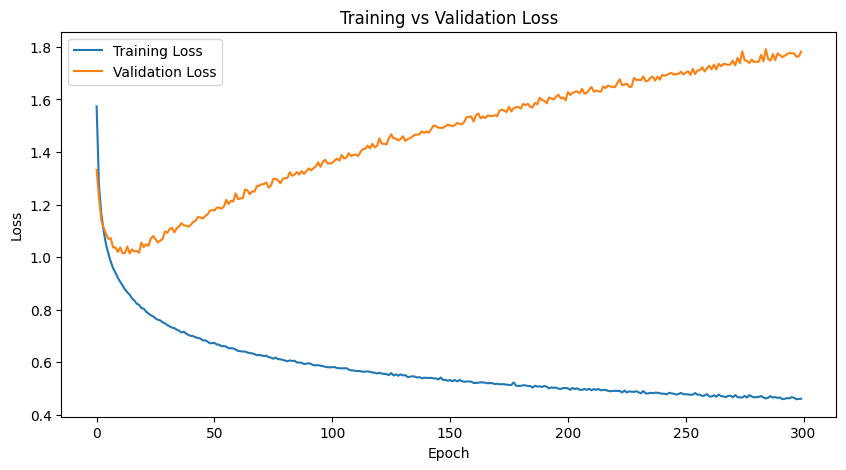

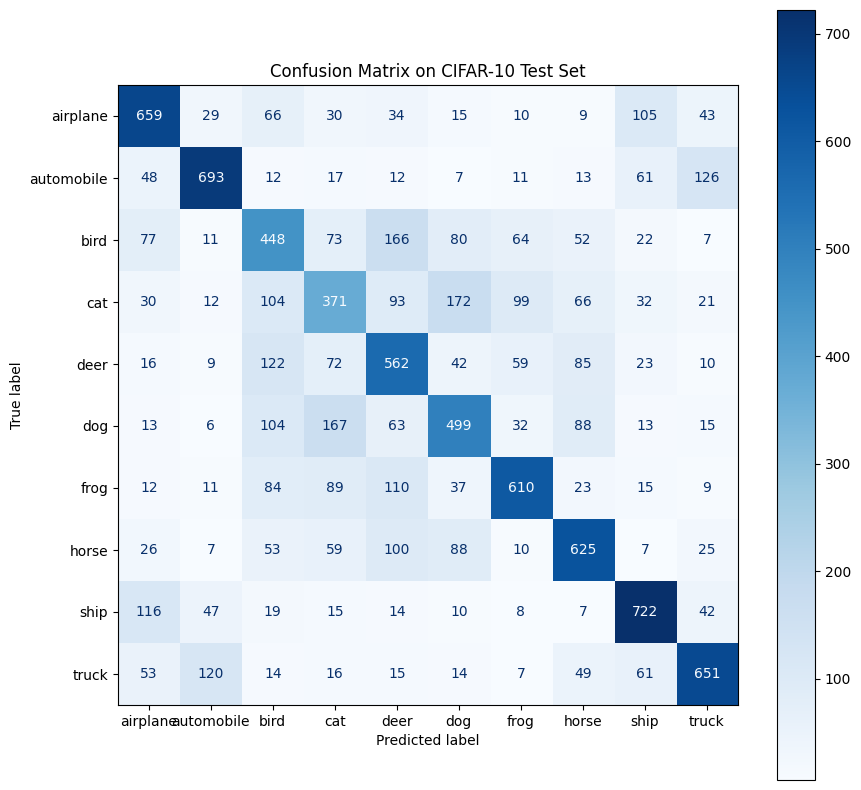

In [2]:
#1a 300 epochs but without CFM metrics and accuracy plot
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16,8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32,10)

    def forward(self,x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

# Model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training
train_losses = []
val_losses = []
start_time = time.time()

for epoch in range(100):  # 100 epochs
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss/len(trainloader)
    train_losses.append(train_loss)

    # Validation loss
    net.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(testloader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

training_time = time.time() - start_time
print(f"Training finished in {training_time/60:.2f} minutes")

# Evaluation
net.eval()
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total
print(f"Accuracy on CIFAR-10 test set: {accuracy:.2f}%")

# Plot training vs validation loss
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=trainset.classes)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix on CIFAR-10 Test Set")
plt.show()


Epoch 1, Train Loss: 1.6203, Val Loss: 1.4290, Val Acc: 49.28%
Epoch 2, Train Loss: 1.3139, Val Loss: 1.2513, Val Acc: 55.44%
Epoch 3, Train Loss: 1.1963, Val Loss: 1.1819, Val Acc: 58.08%
Epoch 4, Train Loss: 1.1220, Val Loss: 1.1464, Val Acc: 59.32%
Epoch 5, Train Loss: 1.0710, Val Loss: 1.1000, Val Acc: 61.09%
Epoch 6, Train Loss: 1.0325, Val Loss: 1.0835, Val Acc: 61.83%
Epoch 7, Train Loss: 1.0026, Val Loss: 1.0532, Val Acc: 63.21%
Epoch 8, Train Loss: 0.9767, Val Loss: 1.0809, Val Acc: 61.94%
Epoch 9, Train Loss: 0.9577, Val Loss: 1.0428, Val Acc: 64.00%
Epoch 10, Train Loss: 0.9411, Val Loss: 1.0323, Val Acc: 64.09%
Epoch 11, Train Loss: 0.9250, Val Loss: 1.0437, Val Acc: 63.64%
Epoch 12, Train Loss: 0.9101, Val Loss: 1.0434, Val Acc: 64.03%
Epoch 13, Train Loss: 0.8977, Val Loss: 1.0394, Val Acc: 64.49%
Epoch 14, Train Loss: 0.8859, Val Loss: 1.0491, Val Acc: 63.70%
Epoch 15, Train Loss: 0.8739, Val Loss: 1.0520, Val Acc: 63.57%
Epoch 16, Train Loss: 0.8658, Val Loss: 1.0316, V

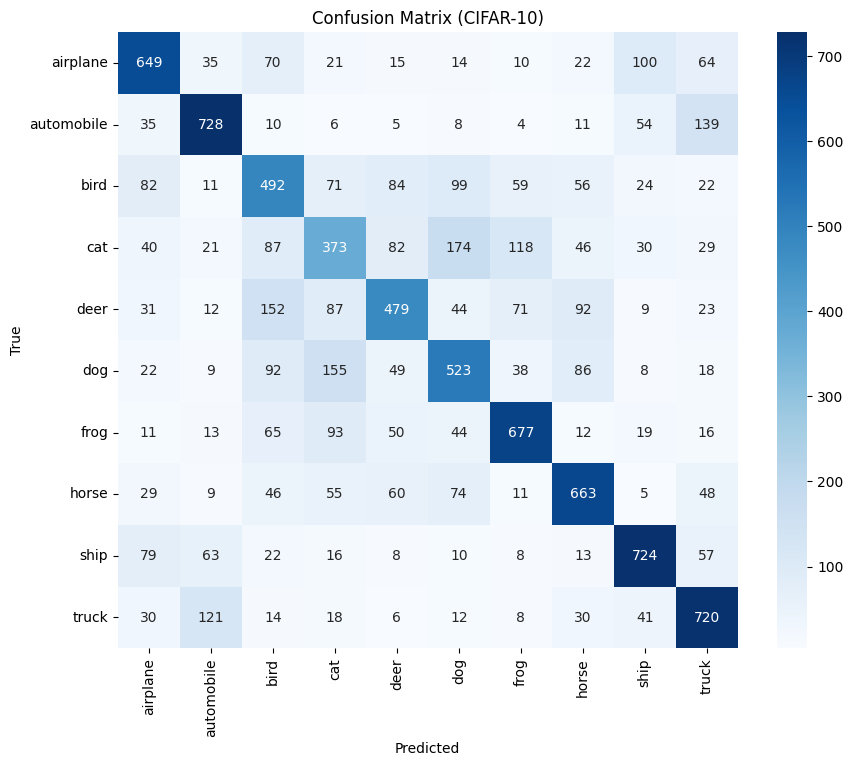

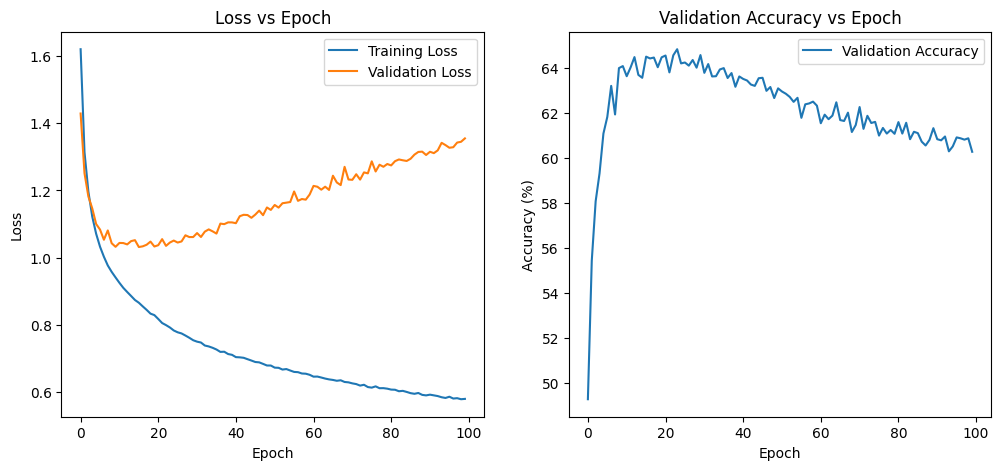

In [13]:
#1a with accuracy and metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16,8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32,10)

    def forward(self,x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

# Model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training
train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(100):  # 100 epochs
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss/len(trainloader)
    train_losses.append(train_loss)

    # Validation loss + accuracy
    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(testloader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

training_time = time.time() - start_time
print(f"Training finished in {training_time/60:.2f} minutes")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * np.mean(np.array(all_preds) == np.array(all_labels))
print(f"Final Test Accuracy: {accuracy:.2f}%")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix (raw counts):\n")
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plotting Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')

plt.subplot(1,2,2)
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()


Epoch 1, Train Loss: 1.6355, Val Loss: 1.3953, Val Acc: 50.29%
Epoch 2, Train Loss: 1.3274, Val Loss: 1.2623, Val Acc: 55.21%
Epoch 3, Train Loss: 1.2270, Val Loss: 1.2398, Val Acc: 55.73%
Epoch 4, Train Loss: 1.1526, Val Loss: 1.1465, Val Acc: 59.14%
Epoch 5, Train Loss: 1.0979, Val Loss: 1.1163, Val Acc: 60.40%
Epoch 6, Train Loss: 1.0607, Val Loss: 1.0779, Val Acc: 62.26%
Epoch 7, Train Loss: 1.0297, Val Loss: 1.0739, Val Acc: 61.94%
Epoch 8, Train Loss: 1.0069, Val Loss: 1.0433, Val Acc: 62.97%
Epoch 9, Train Loss: 0.9869, Val Loss: 1.0457, Val Acc: 63.07%
Epoch 10, Train Loss: 0.9651, Val Loss: 1.0187, Val Acc: 64.11%
Epoch 11, Train Loss: 0.9529, Val Loss: 1.0231, Val Acc: 64.48%
Epoch 12, Train Loss: 0.9406, Val Loss: 1.0159, Val Acc: 64.43%
Epoch 13, Train Loss: 0.9286, Val Loss: 1.0144, Val Acc: 64.63%
Epoch 14, Train Loss: 0.9176, Val Loss: 1.0034, Val Acc: 65.10%
Epoch 15, Train Loss: 0.9072, Val Loss: 1.0195, Val Acc: 65.15%
Epoch 16, Train Loss: 0.9007, Val Loss: 1.0084, V

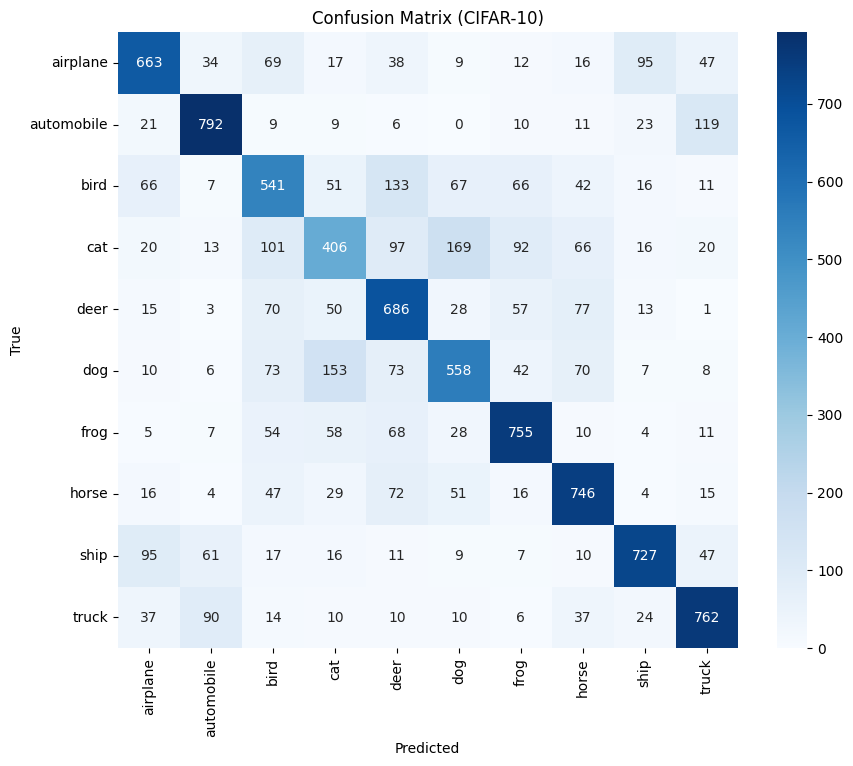

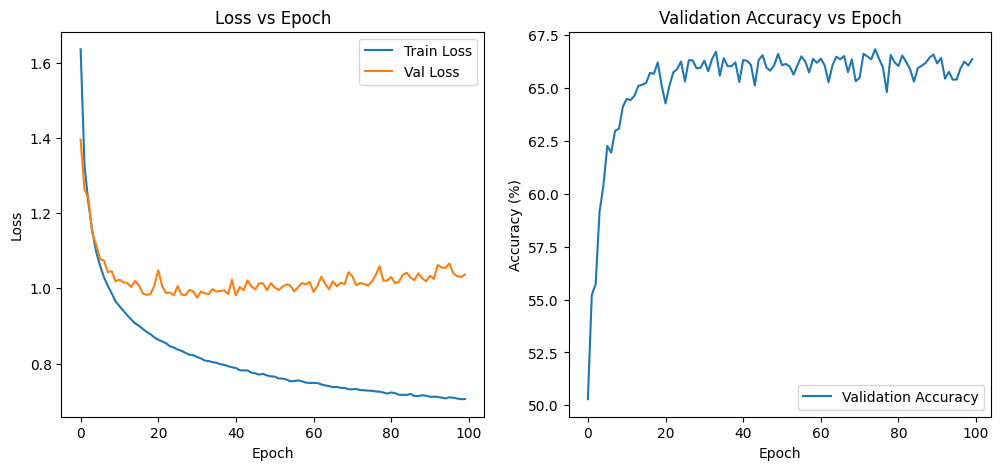

In [12]:
#1b
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16,8, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.act3 = nn.ReLU()
        self.fc2 = nn.Linear(32,10)

    def forward(self,x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8*8*8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False)

# Model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training
train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(100):  # run for 100 epochs
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss/len(trainloader)
    train_losses.append(train_loss)

    # Validation loss + accuracy
    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(testloader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

training_time = time.time() - start_time
print(f"Training finished in {training_time/60:.2f} minutes")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * np.mean(np.array(all_preds) == np.array(all_labels))
print(f"Final Test Accuracy: {accuracy:.2f}%")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix (raw counts):\n")
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plotting Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')

plt.subplot(1,2,2)
plt.plot(val_accs, label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()


Epoch 1: Train Loss=2.1111, Val Loss=2.0737, Val Acc=17.36%
Epoch 2: Train Loss=1.9325, Val Loss=1.9403, Val Acc=22.20%
Epoch 3: Train Loss=1.7767, Val Loss=1.6641, Val Acc=32.16%
Epoch 4: Train Loss=1.6132, Val Loss=1.5374, Val Acc=37.47%
Epoch 5: Train Loss=1.5145, Val Loss=1.4996, Val Acc=39.73%
Epoch 6: Train Loss=1.4428, Val Loss=1.8442, Val Acc=31.96%
Epoch 7: Train Loss=1.3904, Val Loss=1.4943, Val Acc=39.79%
Epoch 8: Train Loss=1.3505, Val Loss=1.4608, Val Acc=41.11%
Epoch 9: Train Loss=1.3140, Val Loss=1.5232, Val Acc=40.41%
Epoch 10: Train Loss=1.2916, Val Loss=1.4768, Val Acc=42.72%
Epoch 11: Train Loss=1.2656, Val Loss=1.3937, Val Acc=46.70%
Epoch 12: Train Loss=1.2418, Val Loss=1.3098, Val Acc=49.19%
Epoch 13: Train Loss=1.2213, Val Loss=1.5776, Val Acc=45.10%
Epoch 14: Train Loss=1.2011, Val Loss=1.2667, Val Acc=53.86%
Epoch 15: Train Loss=1.1826, Val Loss=1.2553, Val Acc=55.28%
Epoch 16: Train Loss=1.1626, Val Loss=1.4226, Val Acc=50.91%
Epoch 17: Train Loss=1.1153, Val 

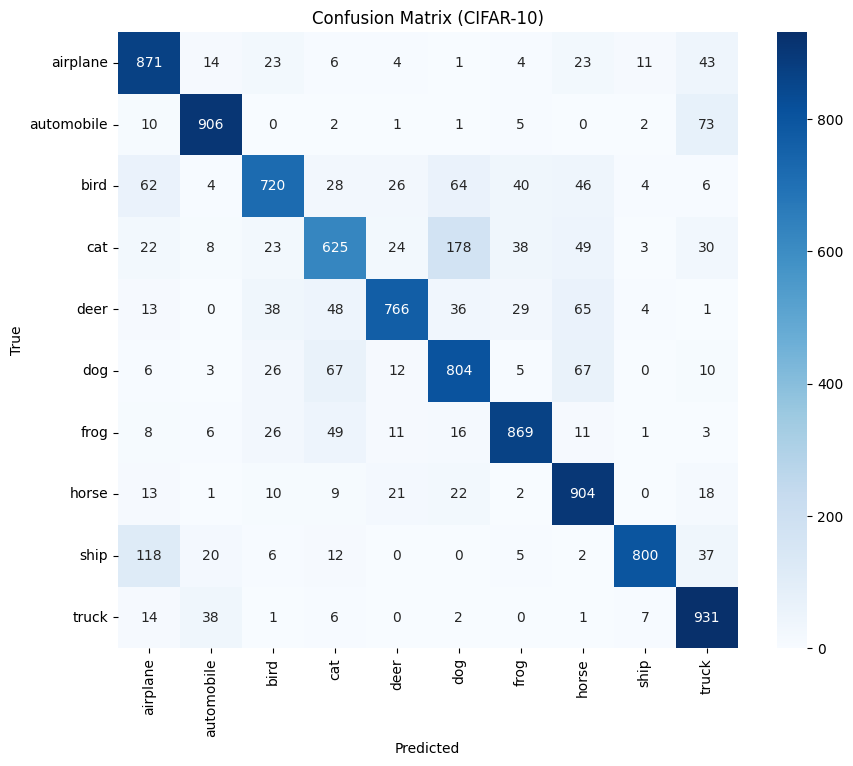

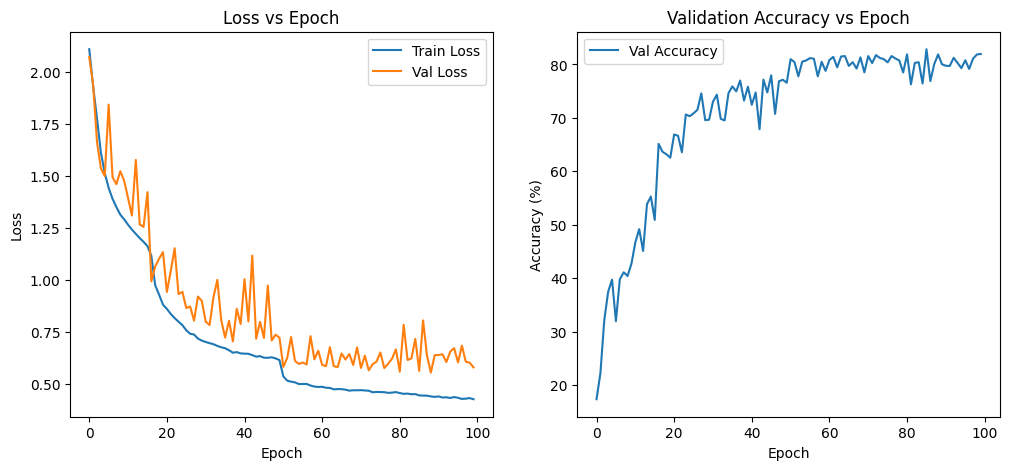

In [5]:
#2a
# Baseline ResNet-10 with Training Tweaks + Evaluation Plots + Seaborn CFM + Classification Report
import torch, torchvision, time
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Residual Block
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super().__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        # Let BatchNorm defaults stand (avoid forcing weight=0.5)
        torch.nn.init.zeros_(self.bn.bias)

    def forward(self, x):
        out = F.relu(self.bn(self.conv(x)))
        return out + x

# ResNet-10 Model
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(n_chans1)
        self.resblocks = nn.Sequential(*[ResBlock(n_chans1) for _ in range(n_blocks)])
        self.fc1 = nn.Linear(8*8*n_chans1, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8*8*self.n_chans1)
        out = F.relu(self.fc1(out))
        return self.fc2(out)

# Data with augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = NetResDeep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)  # add weight decay
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)  # learning rate schedule

train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(100):  # fewer epochs first to monitor
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(testloader))
    val_accs.append(100 * correct / total)
    scheduler.step()  # update learning rate

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, "
          f"Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

print(f"Training time: {time.time() - start_time:.2f} seconds")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Metrics
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# Confusion Matrix with Seaborn
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix (raw counts):\n")
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plot Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')
plt.subplot(1,2,2)
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()


Epoch 1: Train Loss=1.4286, Val Loss=1.2727, Val Acc=55.64%
Epoch 2: Train Loss=0.9293, Val Loss=1.0480, Val Acc=65.10%
Epoch 3: Train Loss=0.7320, Val Loss=0.8018, Val Acc=73.45%
Epoch 4: Train Loss=0.6200, Val Loss=0.6877, Val Acc=76.53%
Epoch 5: Train Loss=0.5505, Val Loss=0.5913, Val Acc=80.09%
Epoch 6: Train Loss=0.4950, Val Loss=0.5322, Val Acc=81.83%
Epoch 7: Train Loss=0.4465, Val Loss=0.5759, Val Acc=81.15%
Epoch 8: Train Loss=0.4181, Val Loss=0.5077, Val Acc=83.42%
Epoch 9: Train Loss=0.3870, Val Loss=0.4602, Val Acc=84.70%
Epoch 10: Train Loss=0.3602, Val Loss=0.4380, Val Acc=85.39%
Epoch 11: Train Loss=0.3403, Val Loss=0.4371, Val Acc=85.55%
Epoch 12: Train Loss=0.3162, Val Loss=0.3868, Val Acc=86.93%
Epoch 13: Train Loss=0.2972, Val Loss=0.4616, Val Acc=85.59%
Epoch 14: Train Loss=0.2848, Val Loss=0.4078, Val Acc=86.44%
Epoch 15: Train Loss=0.2690, Val Loss=0.4014, Val Acc=87.20%
Epoch 16: Train Loss=0.2488, Val Loss=0.3827, Val Acc=87.68%
Epoch 17: Train Loss=0.2376, Val 

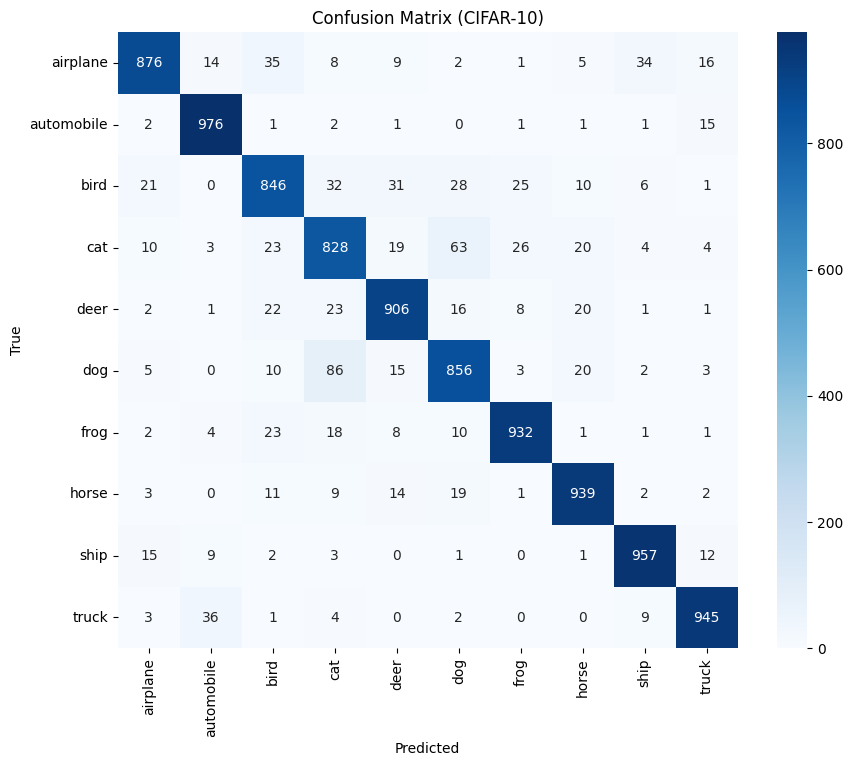

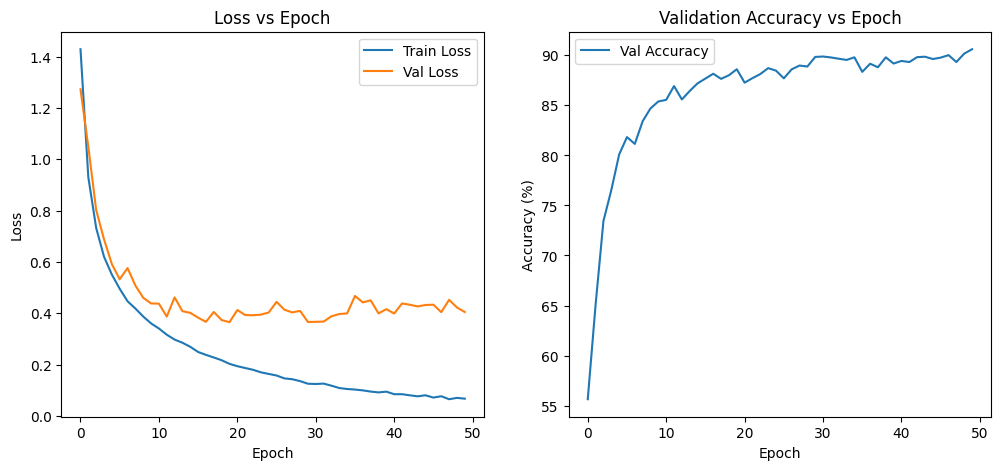

In [6]:
#2b more feature map experiment
import torch, torchvision, time
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Residual Block with optional channel expansion
class ResBlock(nn.Module):
    def __init__(self, in_chans, out_chans, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_chans, out_chans, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_chans)
        self.conv2 = nn.Conv2d(out_chans, out_chans, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_chans)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_chans != out_chans:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_chans, out_chans, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_chans)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return F.relu(out)

# ResNet-10 style model
class NetResDeep(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.layer1 = self._make_layer(32, 32, num_blocks=2, stride=1)
        self.layer2 = self._make_layer(32, 64, num_blocks=2, stride=2)
        self.layer3 = self._make_layer(64, 128, num_blocks=2, stride=2)
        self.layer4 = self._make_layer(128, 256, num_blocks=2, stride=2)
        self.fc = nn.Linear(256, num_classes)

    def _make_layer(self, in_chans, out_chans, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for s in strides:
            layers.append(ResBlock(in_chans, out_chans, stride=s))
            in_chans = out_chans
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        return self.fc(out)

# Data with augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = NetResDeep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(50):  # try 50 first
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    # Validation
    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(testloader))
    val_accs.append(100 * correct / total)
    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

print(f"Training time: {time.time() - start_time:.2f} seconds")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plot Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')
plt.subplot(1,2,2)
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()


Epoch 1: Train Loss=2.1242, Val Loss=1.9570, Val Acc=19.02%
Epoch 2: Train Loss=1.9313, Val Loss=1.8877, Val Acc=21.50%
Epoch 3: Train Loss=1.8749, Val Loss=1.8761, Val Acc=21.05%
Epoch 4: Train Loss=1.8073, Val Loss=1.6960, Val Acc=32.44%
Epoch 5: Train Loss=1.5992, Val Loss=1.5909, Val Acc=35.22%
Epoch 6: Train Loss=1.5305, Val Loss=1.6076, Val Acc=34.17%
Epoch 7: Train Loss=1.4764, Val Loss=1.4970, Val Acc=40.69%
Epoch 8: Train Loss=1.2556, Val Loss=1.2462, Val Acc=52.80%
Epoch 9: Train Loss=1.1020, Val Loss=1.0786, Val Acc=61.27%
Epoch 10: Train Loss=1.0201, Val Loss=1.3111, Val Acc=52.84%
Epoch 11: Train Loss=0.9723, Val Loss=1.0339, Val Acc=62.27%
Epoch 12: Train Loss=0.9338, Val Loss=1.0251, Val Acc=63.01%
Epoch 13: Train Loss=0.9127, Val Loss=0.8580, Val Acc=69.08%
Epoch 14: Train Loss=0.8858, Val Loss=0.9017, Val Acc=67.58%
Epoch 15: Train Loss=0.8634, Val Loss=1.0071, Val Acc=65.21%
Epoch 16: Train Loss=0.8458, Val Loss=1.2508, Val Acc=59.05%
Epoch 17: Train Loss=0.8278, Val 

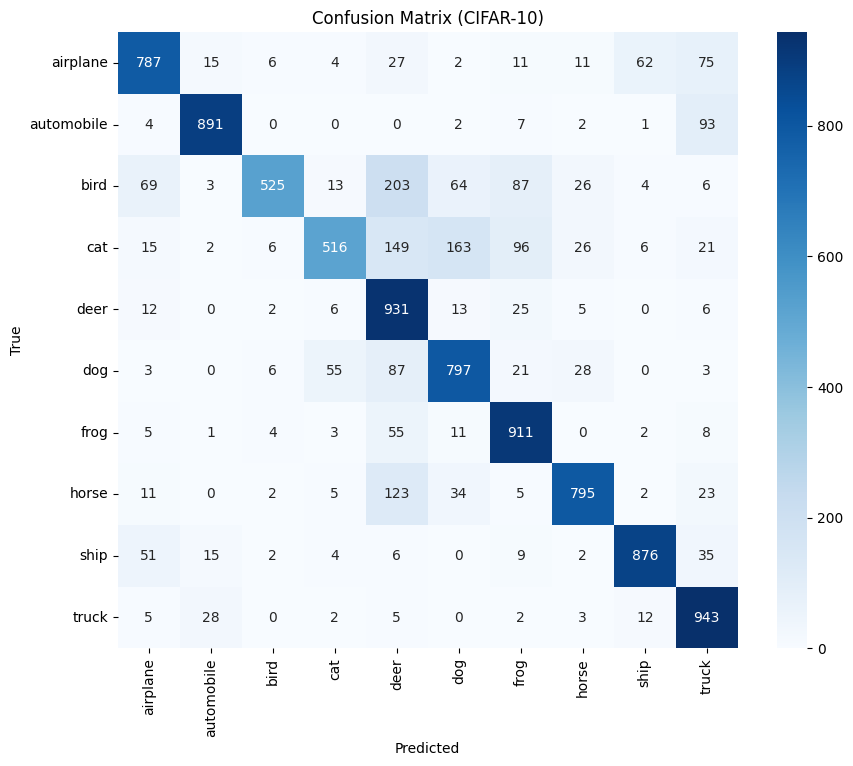

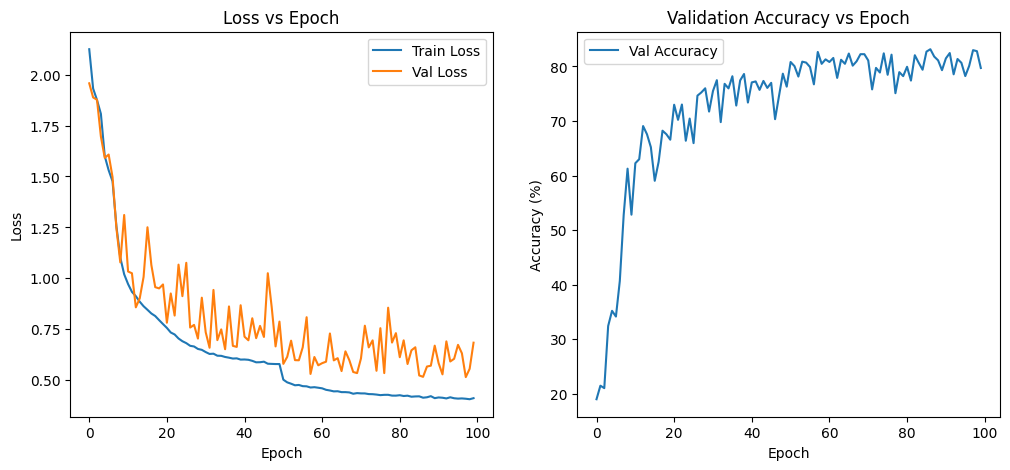

In [7]:
#2b.1 weight decay
import torch, torchvision, time
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Residual Block
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super().__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        # Let BatchNorm defaults stand (avoid forcing weight=0.5)
        torch.nn.init.zeros_(self.bn.bias)

    def forward(self, x):
        out = F.relu(self.bn(self.conv(x)))
        return out + x

# ResNet-10 Model (unchanged)
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(n_chans1)
        self.resblocks = nn.Sequential(*[ResBlock(n_chans1) for _ in range(n_blocks)])
        self.fc1 = nn.Linear(8*8*n_chans1, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8*8*self.n_chans1)
        out = F.relu(self.fc1(out))
        return self.fc2(out)

# Data with augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = NetResDeep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)  # learning rate schedule

train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(100):  # fewer epochs first to monitor
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(testloader))
    val_accs.append(100 * correct / total)
    scheduler.step()

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, "
          f"Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

print(f"Training time: {time.time() - start_time:.2f} seconds")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Metrics
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# Confusion Matrix with Seaborn
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix (raw counts):\n")
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plotting Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')
plt.subplot(1,2,2)
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()


Epoch 1: Train Loss=2.3203, Val Loss=2.3027, Val Acc=10.00%
Epoch 2: Train Loss=2.3027, Val Loss=2.3026, Val Acc=10.00%
Epoch 3: Train Loss=2.2972, Val Loss=2.1634, Val Acc=17.68%
Epoch 4: Train Loss=2.1496, Val Loss=2.0330, Val Acc=19.88%
Epoch 5: Train Loss=2.1073, Val Loss=1.9703, Val Acc=21.35%
Epoch 6: Train Loss=2.0806, Val Loss=1.8380, Val Acc=23.28%
Epoch 7: Train Loss=1.8849, Val Loss=1.6613, Val Acc=30.19%
Epoch 8: Train Loss=1.7805, Val Loss=1.5455, Val Acc=37.30%
Epoch 9: Train Loss=1.6609, Val Loss=1.4497, Val Acc=42.46%
Epoch 10: Train Loss=1.5438, Val Loss=1.3147, Val Acc=49.52%
Epoch 11: Train Loss=1.4287, Val Loss=1.1738, Val Acc=57.98%
Epoch 12: Train Loss=1.3095, Val Loss=1.1351, Val Acc=57.78%
Epoch 13: Train Loss=1.2476, Val Loss=1.0964, Val Acc=59.85%
Epoch 14: Train Loss=1.2012, Val Loss=0.9957, Val Acc=64.74%
Epoch 15: Train Loss=1.1528, Val Loss=1.0161, Val Acc=64.46%
Epoch 16: Train Loss=1.1200, Val Loss=0.9496, Val Acc=65.48%
Epoch 17: Train Loss=1.1034, Val 

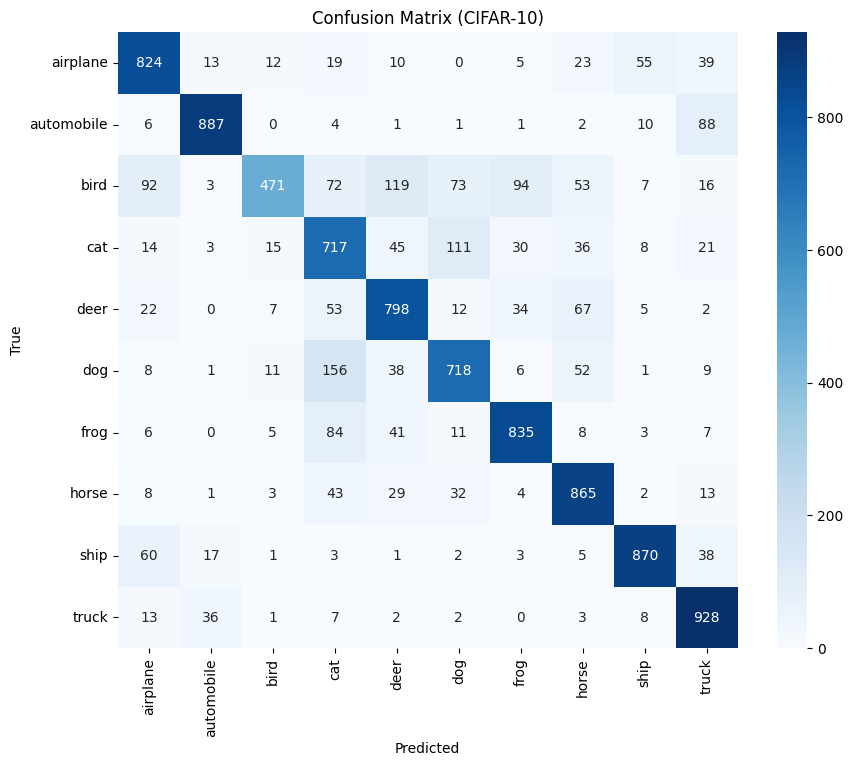

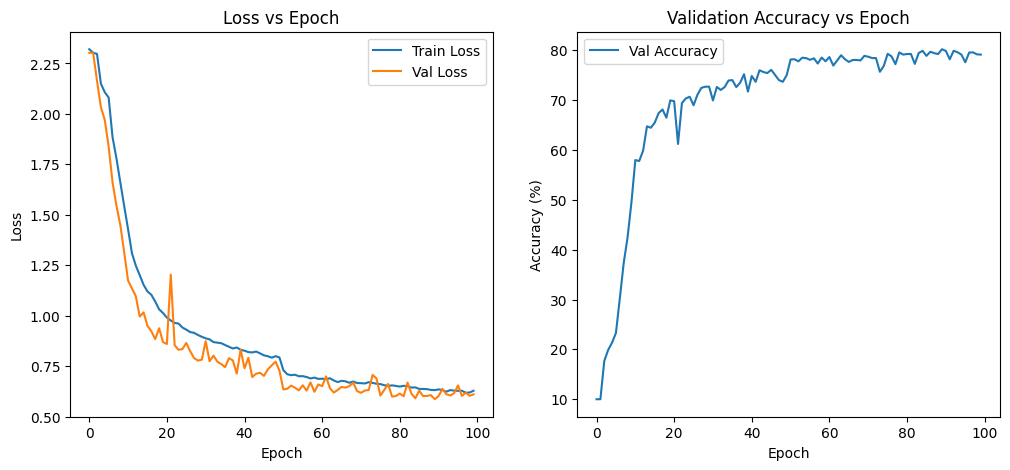

In [8]:
#2b.2
import torch, torchvision, time
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Residual Block
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super().__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        # Let BatchNorm defaults stand (avoid forcing weight=0.5)
        torch.nn.init.zeros_(self.bn.bias)

    def forward(self, x):
        out = F.relu(self.bn(self.conv(x)))
        return out + x

# ResNet-10 Model (unchanged, with Dropout)
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(n_chans1)
        self.resblocks = nn.Sequential(*[ResBlock(n_chans1) for _ in range(n_blocks)])
        self.fc1 = nn.Linear(8*8*n_chans1, 64)
        self.dropout = nn.Dropout(p=0.3)   # Dropout added
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8*8*self.n_chans1)
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        return self.fc2(out)

# Data with augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = NetResDeep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)  # learning rate schedule

train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(100):  # fewer epochs first to monitor
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(testloader))
    val_accs.append(100 * correct / total)
    scheduler.step()

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, "
          f"Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

print(f"Training time: {time.time() - start_time:.2f} seconds")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Metrics
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# Confusion Matrix with Seaborn
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix (raw counts):\n")
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plotting Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')
plt.subplot(1,2,2)
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()


Epoch 1: Train Loss=1.7105, Val Loss=1.6017, Val Acc=43.34%
Epoch 2: Train Loss=1.2753, Val Loss=1.1721, Val Acc=57.20%
Epoch 3: Train Loss=1.1077, Val Loss=1.2270, Val Acc=57.00%
Epoch 4: Train Loss=1.0051, Val Loss=0.9021, Val Acc=68.28%
Epoch 5: Train Loss=0.9314, Val Loss=0.9573, Val Acc=66.27%
Epoch 6: Train Loss=0.8841, Val Loss=1.0931, Val Acc=64.23%
Epoch 7: Train Loss=0.8367, Val Loss=1.4216, Val Acc=55.11%
Epoch 8: Train Loss=0.8160, Val Loss=0.9991, Val Acc=65.72%
Epoch 9: Train Loss=0.7823, Val Loss=1.2671, Val Acc=61.28%
Epoch 10: Train Loss=0.7548, Val Loss=1.2001, Val Acc=63.30%
Epoch 11: Train Loss=0.7333, Val Loss=0.8680, Val Acc=71.48%
Epoch 12: Train Loss=0.7059, Val Loss=0.9004, Val Acc=71.23%
Epoch 13: Train Loss=0.6963, Val Loss=1.4081, Val Acc=61.83%
Epoch 14: Train Loss=0.6821, Val Loss=1.3802, Val Acc=61.85%
Epoch 15: Train Loss=0.6684, Val Loss=0.7743, Val Acc=74.16%
Epoch 16: Train Loss=0.6540, Val Loss=0.8114, Val Acc=73.62%
Epoch 17: Train Loss=0.6403, Val 

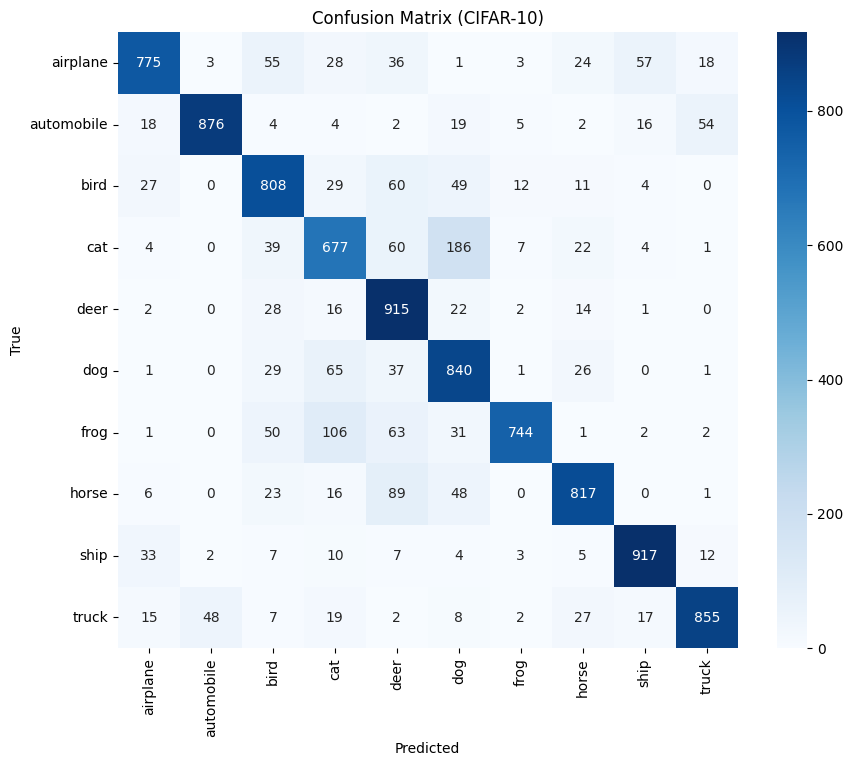

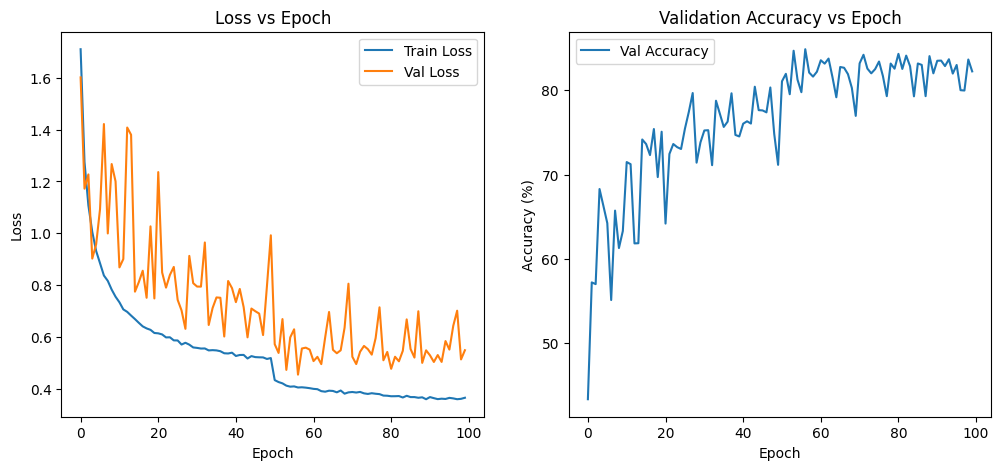

In [9]:
#2b.3 batchnorm
import torch, torchvision, time
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Residual Block
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super().__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        # Let BatchNorm defaults stand (avoid forcing weight=0.5)
        torch.nn.init.zeros_(self.bn.bias)

    def forward(self, x):
        out = F.relu(self.bn(self.conv(x)))
        return out + x

# ResNet-10 Model (unchanged)
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(n_chans1)
        self.resblocks = nn.Sequential(*[ResBlock(n_chans1) for _ in range(n_blocks)])
        self.fc1 = nn.Linear(8*8*n_chans1, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8*8*self.n_chans1)
        out = F.relu(self.fc1(out))
        return self.fc2(out)

# Data with augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = NetResDeep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)  # add weight decay
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)  # learning rate schedule

train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(100):  # fewer epochs first to monitor
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(testloader))
    val_accs.append(100 * correct / total)
    scheduler.step()

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, "
          f"Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

print(f"Training time: {time.time() - start_time:.2f} seconds")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Metrics
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# Confusion Matrix with Seaborn
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix (raw counts):\n")
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plotting Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')
plt.subplot(1,2,2)
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()


Epoch 1: Train Loss=2.3217, Val Loss=2.3026, Val Acc=10.00%
Epoch 2: Train Loss=2.3024, Val Loss=2.3026, Val Acc=10.00%
Epoch 3: Train Loss=2.3027, Val Loss=2.3026, Val Acc=10.00%
Epoch 4: Train Loss=2.3027, Val Loss=2.3026, Val Acc=10.00%
Epoch 5: Train Loss=1.9813, Val Loss=1.7078, Val Acc=31.11%
Epoch 6: Train Loss=1.7838, Val Loss=1.5943, Val Acc=36.52%
Epoch 7: Train Loss=1.7015, Val Loss=1.5110, Val Acc=42.09%
Epoch 8: Train Loss=1.6025, Val Loss=1.3522, Val Acc=48.52%
Epoch 9: Train Loss=1.5485, Val Loss=1.3102, Val Acc=52.41%
Epoch 10: Train Loss=1.5173, Val Loss=1.3177, Val Acc=52.13%
Epoch 11: Train Loss=1.4697, Val Loss=1.2303, Val Acc=55.78%
Epoch 12: Train Loss=1.3978, Val Loss=1.1831, Val Acc=58.64%
Epoch 13: Train Loss=1.3287, Val Loss=1.1951, Val Acc=56.79%
Epoch 14: Train Loss=1.2804, Val Loss=1.0820, Val Acc=61.65%
Epoch 15: Train Loss=1.1994, Val Loss=1.0765, Val Acc=60.43%
Epoch 16: Train Loss=1.1440, Val Loss=0.9967, Val Acc=64.67%
Epoch 17: Train Loss=1.0947, Val 

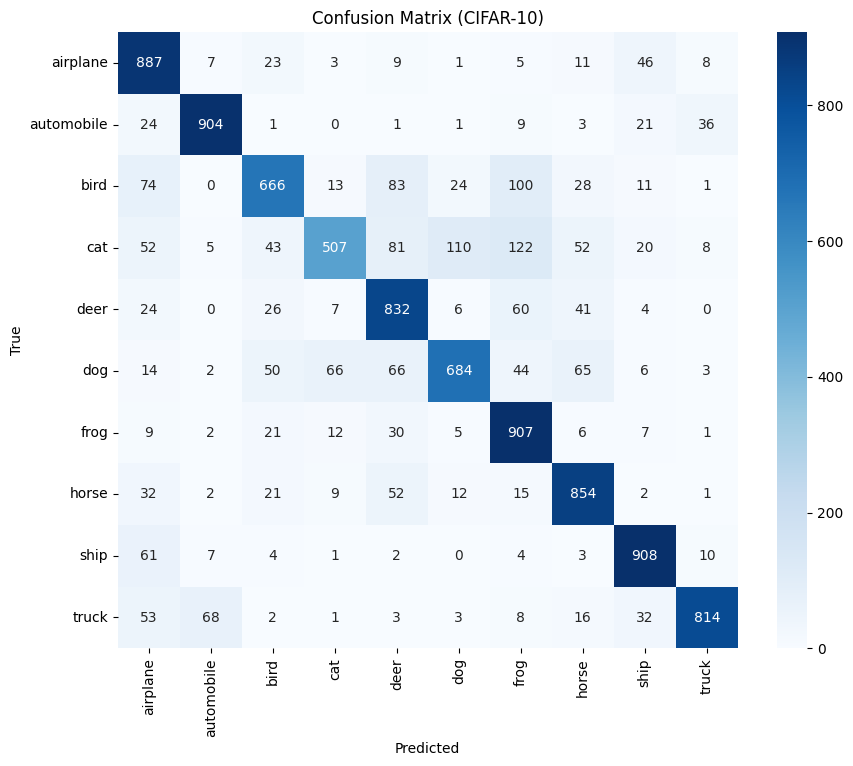

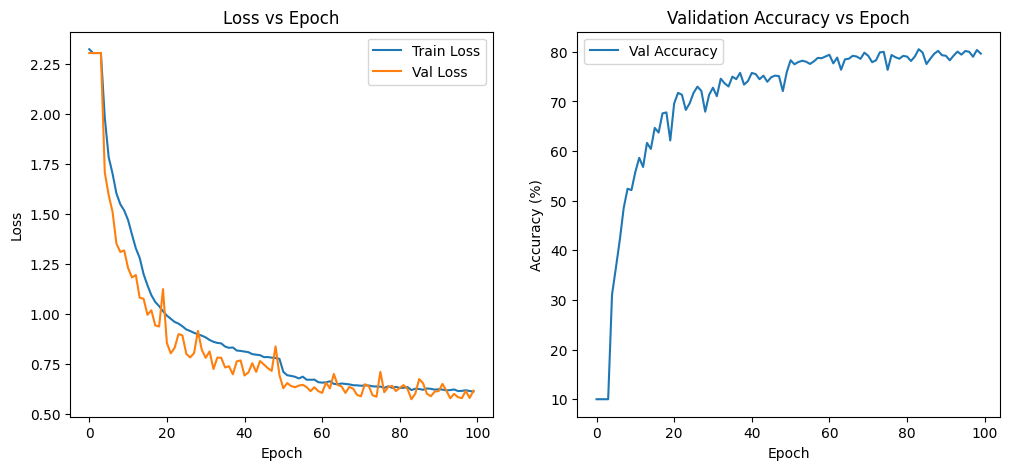

In [10]:
#2b experiment all together
import torch, torchvision, time
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Residual Block
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super().__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.bn = nn.BatchNorm2d(n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        # Let BatchNorm defaults stand (avoid forcing weight=0.5)
        torch.nn.init.zeros_(self.bn.bias)

    def forward(self, x):
        out = F.relu(self.bn(self.conv(x)))
        return out + x

# ResNet-10 Model (unchanged, with Dropout + Weight Decay)
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(n_chans1)
        self.resblocks = nn.Sequential(*[ResBlock(n_chans1) for _ in range(n_blocks)])
        self.fc1 = nn.Linear(8*8*n_chans1, 64)
        self.dropout = nn.Dropout(p=0.3)   # Dropout added
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8*8*self.n_chans1)
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        return self.fc2(out)

# Data with augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = NetResDeep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)  # Weight Decay
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)  # learning rate schedule

train_losses, val_losses, val_accs = [], [], []
start_time = time.time()

for epoch in range(100):  # fewer epochs first to monitor
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))

    net.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(testloader))
    val_accs.append(100 * correct / total)
    scheduler.step()

    print(f"Epoch {epoch+1}: Train Loss={train_losses[-1]:.4f}, "
          f"Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

print(f"Training time: {time.time() - start_time:.2f} seconds")

# Final Evaluation
net.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Metrics
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# Confusion Matrix with Seaborn
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix (raw counts):\n")
print(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (CIFAR-10)")
plt.show()

# Plotting Loss and Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss vs Epoch')
plt.subplot(1,2,2)
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.legend(); plt.title('Validation Accuracy vs Epoch')
plt.show()
